In [69]:
import numpy as np
from random import randint
from sklearn.utils import shuffle

In [70]:
train_labels = []   #target
train_samples = []  #input

In [71]:
# 1 - side effect, 0 - no side effect
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [72]:
print(type(train_labels))
print(type(train_samples))

<class 'list'>
<class 'list'>


In [73]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

print(type(train_samples))
print(type(train_labels))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [74]:
#save in a csv file

import pandas as pd
df = pd.DataFrame(train_samples, train_labels)
df.to_csv('train.csv', index=False)


<BarContainer object of 2100 artists>

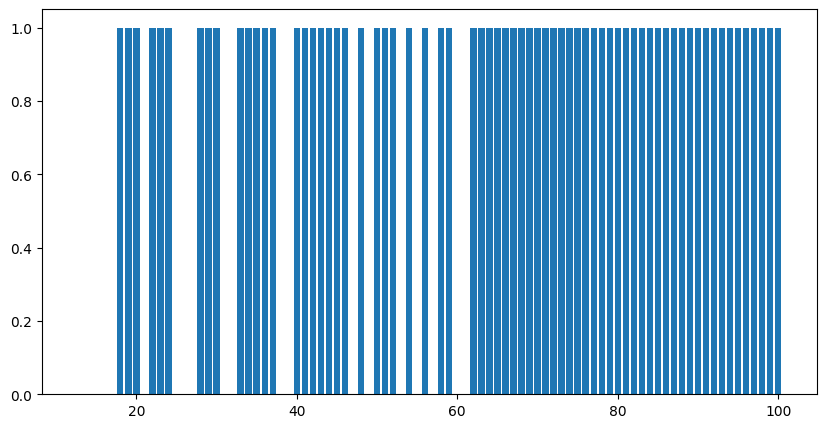

In [76]:
#graph the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(train_samples, train_labels)

In [78]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

df = pd.DataFrame(scaled_train_samples, train_labels)
df.to_csv('train1.csv', index=False)

MinMaxScaler()


In [80]:
import tensorflow as tf
import keras
from tensorflow import keras
from keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [99]:

model = keras.Sequential([
    layers.Dense(name='layer_1', units=16, input_shape=(1,), activation='relu'),
    layers.Dense(name='layer_2', units=32, activation='relu'),
    layers.Dense(name='layer_3', units=2, activation='softmax'),
])

In [ ]:
model = keras.Sequential()

model.add(layers.Dense(name='layer_1', units=16, input_shape=(1,), activation='relu'))
model.add(layers.Dense(name='layer_2', units=32, activation='relu'))

In [100]:
model.layers

[<Dense name=layer_1, built=True>,
 <Dense name=layer_2, built=True>,
 <Dense name=layer_3, built=True>]

In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))
# predictions = model.predict(scaled_train_samples, batch_size=10, verbose=0)

In [104]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 3s - 18ms/step - accuracy: 0.5370 - loss: 0.6602 - val_accuracy: 0.5952 - val_loss: 0.6372
Epoch 2/30
189/189 - 1s - 3ms/step - accuracy: 0.6021 - loss: 0.6331 - val_accuracy: 0.6524 - val_loss: 0.6087
Epoch 3/30
189/189 - 1s - 4ms/step - accuracy: 0.6561 - loss: 0.6078 - val_accuracy: 0.7190 - val_loss: 0.5807
Epoch 4/30
189/189 - 1s - 3ms/step - accuracy: 0.7280 - loss: 0.5767 - val_accuracy: 0.7571 - val_loss: 0.5485
Epoch 5/30
189/189 - 0s - 2ms/step - accuracy: 0.7704 - loss: 0.5485 - val_accuracy: 0.8000 - val_loss: 0.5214
Epoch 6/30
189/189 - 0s - 2ms/step - accuracy: 0.8011 - loss: 0.5221 - val_accuracy: 0.8286 - val_loss: 0.4943
Epoch 7/30
189/189 - 0s - 2ms/step - accuracy: 0.8180 - loss: 0.4962 - val_accuracy: 0.8476 - val_loss: 0.4697
Epoch 8/30
189/189 - 0s - 3ms/step - accuracy: 0.8392 - loss: 0.4710 - val_accuracy: 0.8762 - val_loss: 0.4448
Epoch 9/30
189/189 - 0s - 2ms/step - accuracy: 0.8540 - loss: 0.4468 - val_accuracy: 0.8857 - val_loss: 0.4217


In [105]:
#save model

model.save('mymodel.h5')